<a href="https://colab.research.google.com/github/amilsiddik/Deep-Learning/blob/main/LSTM_gagal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('/content/TSLA.csv',index_col='Date',parse_dates=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [20]:
df_baru = df.loc[:,['Close']]

In [21]:
df_baru.describe()

,Close
count,3082.000000
mean,55.786766
std,94.171674
min,1.053333
25%,8.120000
50%,16.002999
75%,23.559834
max,409.970001


In [22]:
df_baru.head()

,Close
Date,
2010-06-29,1.592667
2010-06-30,1.588667
2010-07-01,1.464000
2010-07-02,1.280000
2010-07-06,1.074000


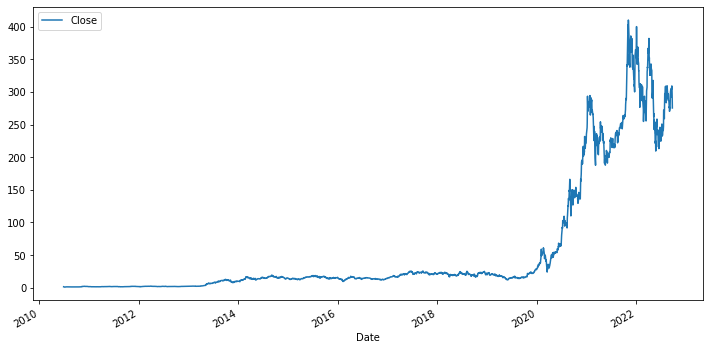

In [23]:
df_baru.plot(figsize=(12,6))

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [26]:
len(df_baru)

3082

3082-316

In [29]:
train = df_baru.iloc[:2717]
test = df_baru.iloc[2717:]

In [30]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [31]:
df_baru.head(),df_baru.tail()

(               Close
 Date                
 2010-06-29  1.592667
 2010-06-30  1.588667
 2010-07-01  1.464000
 2010-07-02  1.280000
 2010-07-06  1.074000,                  Close
 Date                  
 2022-09-19  309.070007
 2022-09-20  308.730011
 2022-09-21  300.799988
 2022-09-22  288.589996
 2022-09-23  275.329987)

In [32]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [33]:
scaled_train[:10]

array([[1.83878485e-03],
       [1.82514740e-03],
       [1.40011247e-03],
       [7.72789857e-04],
       [7.04612845e-05],
       [0.00000000e+00],
       [3.77303865e-04],
       [3.63666417e-04],
       [2.84115773e-04],
       [5.31860473e-04]])

In [34]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [35]:
# define generator
n_input = 3
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [36]:
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.00183878 0.00182515 0.00140011]
Predict this y: 
 [[0.00077279]]


In [37]:
X.shape

(1, 3, 1)

In [43]:
# We do the same thing, but now instead for 30 days
n_input = 30
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [39]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [44]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [45]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 100)               40800     
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [46]:
# fit model
model.fit(generator,epochs=50)

Epoch 1/50
2687/2687 [==============================] - 113s 42ms/step - loss: 0.0016
Epoch 2/50
2687/2687 [==============================] - 116s 43ms/step - loss: 3.7742e-04
Epoch 3/50
2687/2687 [==============================] - 116s 43ms/step - loss: 2.3269e-04
Epoch 4/50
2687/2687 [==============================] - 115s 43ms/step - loss: 2.7784e-04
Epoch 5/50
2687/2687 [==============================] - 117s 43ms/step - loss: 1.6248e-04
Epoch 6/50
2687/2687 [==============================] - 117s 43ms/step - loss: 2.0085e-04
Epoch 7/50
2687/2687 [==============================] - 114s 43ms/step - loss: 1.7032e-04
Epoch 8/50
2687/2687 [==============================] - 114s 42ms/step - loss: 1.6435e-04
Epoch 9/50
2687/2687 [==============================] - 115s 43ms/step - loss: 1.4141e-04
Epoch 10/50
2687/2687 [==============================] - 113s 42ms/step - loss: 1.3583e-04
Epoch 11/50
2687/2687 [==============================] - 115s 43ms/step - loss: 1.5738e-04
Epoch 12/50


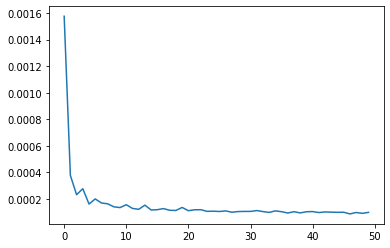

In [47]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [52]:
last_train_batch = scaled_train[-30:]

In [53]:
last_train_batch = last_train_batch.reshape((1, n_input, n_features))

In [54]:
model.predict(last_train_batch)

1/1 [==============================] - 0s 174ms/step


array([[0.8213055]], dtype=float32)

In [55]:
scaled_test[0]

array([0.83607787])

In [56]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 17ms/step


In [57]:
test_predictions

[array([0.8213055], dtype=float32),
 array([0.81912816], dtype=float32),
 array([0.8148192], dtype=float32),
 array([0.810644], dtype=float32),
 array([0.80652773], dtype=float32),
 array([0.8024652], dtype=float32),
 array([0.7984571], dtype=float32),
 array([0.79450655], dtype=float32),
 array([0.79061735], dtype=float32),
 array([0.7867925], dtype=float32),
 array([0.7830346], dtype=float32),
 array([0.77934504], dtype=float32),
 array([0.77572435], dtype=float32),
 array([0.7721728], dtype=float32),
 array([0.76869017], dtype=float32),
 array([0.7652754], dtype=float32),
 array([0.76192784], dtype=float32),
 array([0.75864583], dtype=float32),
 array([0.7554284], dtype=float32),
 array([0.752274], dtype=float32),
 array([0.7491813], dtype=float32),
 array([0.74614865], dtype=float32),
 array([0.7431746], dtype=float32),
 array([0.7402578], dtype=float32),
 array([0.7373967], dtype=float32),
 array([0.7345899], dtype=float32),
 array([0.731836], dtype=float32),
 array([0.7291336], d

In [58]:
test.head()

,Close
Date,
2021-04-15,246.283340
2021-04-16,246.593338
2021-04-19,238.210007
2021-04-20,239.663330
2021-04-21,248.039993


In [59]:
true_predictions = scaler.inverse_transform(test_predictions)

In [60]:
test['Predictions'] = true_predictions

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [63]:
test


,Close,Predictions
Date,,
2021-04-15,246.283340,241.950461
2021-04-16,246.593338,241.311820
2021-04-19,238.210007,240.047965
2021-04-20,239.663330,238.823323
2021-04-21,248.039993,237.615990
...,...,...
2022-09-19,309.070007,160.167095
2022-09-20,308.730011,160.149927
2022-09-21,300.799988,160.132917


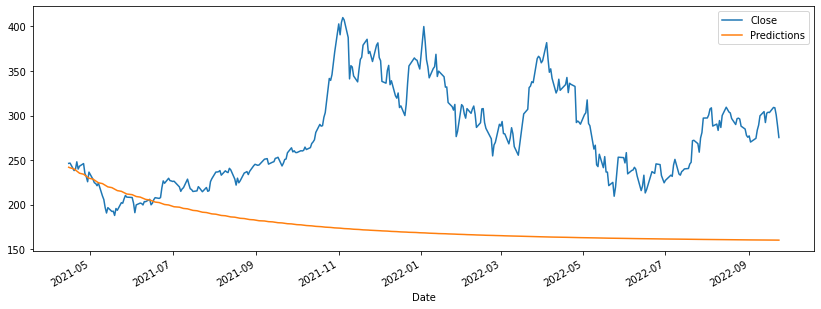

In [61]:

test.plot(figsize=(14,5))

In [64]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test['Close'],test['Predictions']))
print(rmse)

118.9114015843022
